In [ ]:
pip install pymc3

In [ ]:
pip install causalgraphicalmodels

In [ ]:
pip install -U daft


# #The model now represents a scenario where A affects both B and C, B and C both affect D, and there is an unobserved confounder U that affects B, C, and D. 
# #The model is then simulated by generating random values for the variables A, B, C, D, and U, and plotted to visualize their relationships. 
# #Next, two Bayesian models are fit to the simulated data using PyMC3. The first model estimates the direct effect of B and C on D, and the second model estimates the direct effect of A, B, and C on D
# #The models specify that the mean of the D variable is a linear combination of the predictor variables, with Gaussian noise added. 
# #The models are then fit to the data using the sample function, and a summary of the fitted models is printed using az.summary.

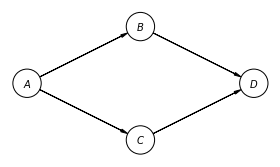

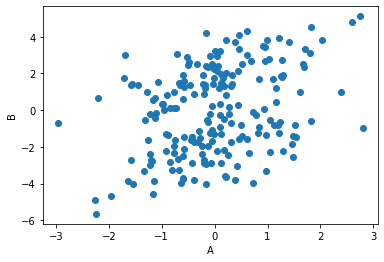

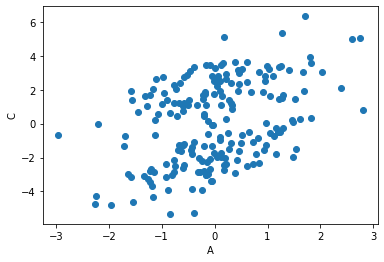

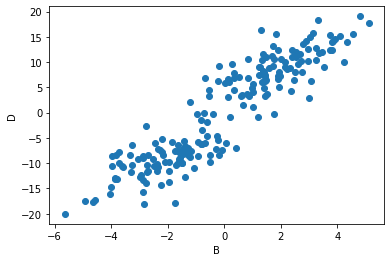

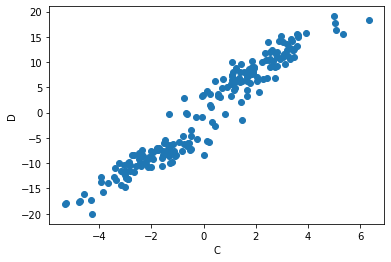

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


Model 1 summary:


/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
M,-0.08,0.07,-0.22,0.06,0.0,0.0,2257.34,1200.09,1.0
Z,1.12,0.06,1.01,1.25,0.0,0.0,1634.12,1288.11,1.0
W,2.31,0.06,2.20,2.42,0.0,0.0,1827.85,1328.47,1.0
Q,2.04,0.14,1.74,2.28,0.0,0.0,1809.22,1261.66,1.0
sigma,1.03,0.05,0.94,1.13,0.0,0.0,1752.43,935.25,1.0


In [ ]:
#The model now represents a scenario where A affects both B and C, B and C both affect D, and there is an unobserved confounder U that affects B, C, and D. 
#The model is then simulated by generating random values for the variables A, B, C, D, and U, and plotted to visualize their relationships. 
#Next, two Bayesian models are fit to the simulated data using PyMC3. The first model estimates the direct effect of B and C on D, and the second model estimates the direct effect of A, B, and C on D
#The models specify that the mean of the D variable is a linear combination of the predictor variables, with Gaussian noise added. 
#The models are then fit to the data using the sample function, and a summary of the fitted models is printed using az.summary.

import os
import warnings

import arviz as az
import daft
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm

from causalgraphicalmodels import CausalGraphicalModel
from scipy import stats
from scipy.interpolate import griddata
from theano import shared


#In this model, A is a fork node, B and C are pipe nodes, and D is a collider confound node.

# Create a PGM object
pgm = daft.PGM()

# Add nodes to the PGM object
pgm.add_node(daft.Node("A", r"$A$", 0, 2))
pgm.add_node(daft.Node("B", r"$B$", 2, 3))
pgm.add_node(daft.Node("C", r"$C$", 2, 1))
pgm.add_node(daft.Node("D", r"$D$", 4, 2))

# Add edges to the PGM object
pgm.add_edge("A", "B")
pgm.add_edge("A", "C")
pgm.add_edge("B", "D")
pgm.add_edge("C", "D")

# Render the PGM
pgm.render()

N = 200   # number  triads
X = 0.85  # direct effect of A on B
Y = 0.95  # direct effect of A on C
Z = 1.2   # direct effect of B on D
W = 2.25  # direct effect of C on D
Q = 2     # direct effect of U on D and C AND B

U = 2 * np.random.binomial(1, 0.5, N) - 1
A = np.random.normal(size=N)
B = np.random.normal(X * A + Q * U)
C = np.random.normal(Y * A + Q * U)
D=  np.random.normal(Z * B + W * C + Q * U)
T = pd.DataFrame.from_dict ({"D": D, "B": B, "C": C, "A": A, "U": U})

# Create a new figure for the first plot
plt.figure()


plt.scatter(A, B)
plt.xlabel("A")
plt.ylabel("B")
plt.show()

plt.scatter(A, C)
plt.xlabel("A")
plt.ylabel("C")
plt.show()

plt.scatter(B, D)
plt.xlabel("B")
plt.ylabel("D")
plt.show()

plt.scatter(C, D)
plt.xlabel("C")
plt.ylabel("D")
plt.show()


with pm.Model() as m_6_12:
    M = pm.Normal("M", 0, 1)
    Z=  pm.Normal("Z", 0, 1)
    W=  pm.Normal("W", 0, 1)
    Q = pm.Normal("Q", 0, 1)

    mu = M + Z * T.B + W * T.C+ Q * T.U
    sigma = pm.Exponential("sigma", 1)

    pC = pm.Normal("D", mu, sigma, observed=T.D)

    m_6_12_trace = pm.sample()

print("Model 1 summary:")
az.summary(m_6_12_trace, round_to=2)





In [ ]:

N = 200   # number  triads
X = 0.85  # direct effect of A on B
Y = 0.95  # direct effect of A on C
Z = 1.2   # direct effect of B on D
W = 2.25  # direct effect of C on D
Q = 2     # direct effect of U on D and C AND B

U = 2 * np.random.binomial(1, 0.5, N) - 1
A = np.random.normal(size=N)
B = np.random.normal(X * A + Q * U)
C = np.random.normal(Y * A + Q * U)
D=  np.random.normal(Z * B + W * C + Q * U)
T = pd.DataFrame.from_dict ({"D": D, "B": B, "C": C, "A": A, "U": U})



with pm.Model() as m_6_13:
    M = pm.Normal("M", 0, 1)
    X=  pm.Normal("X", 0, 1)
    Y=  pm.Normal("Y", 0, 1)
    Z=  pm.Normal("Z", 0, 1)
    W=  pm.Normal("W", 0, 1)
    Q = pm.Normal("Q", 0, 1)

    mu = M + X * T.A+ Y * T.A+ Z * T.B + W * T.C+ Q * T.U
    sigma = pm.Exponential("sigma", 1)

    pC = pm.Normal("D", mu, sigma, observed=T.D)

    m_6_13_trace = pm.sample()

print("Model 2 summary:")
az.summary(m_6_13_trace, round_to=2)






/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:pymc3:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Model 2 summary:


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
M,0.03,0.07,-0.10,0.17,0.00,0.00,1899.38,1246.37,1.0
X,-0.00,0.74,-1.42,1.37,0.02,0.02,1284.63,1147.19,1.0
Y,0.02,0.74,-1.35,1.42,0.02,0.02,1203.28,1127.97,1.0
Z,1.24,0.07,1.10,1.38,0.00,0.00,977.12,1180.55,1.0
W,2.22,0.07,2.09,2.35,0.00,0.00,1166.47,1135.09,1.0
Q,1.87,0.21,1.45,2.24,0.01,0.00,997.77,1048.57,1.0
sigma,1.04,0.05,0.95,1.14,0.00,0.00,1632.32,1011.86,1.0


#>According to the HDI values, Model 2 has higher credibility intervals for all the parameters except for M and sigma, where the HDI values for Model 1 are higher. 
#>This means that for Model 2, we have more certain estimates for most of the parameters compared to Model 1. 

In [ ]:
N = 200   # number  triads
X = 0.85  # direct effect of A on B
Z = 1.2   # direct effect of B on D
Q = 2     # direct effect of U on D and C AND B

U = 2 * np.random.binomial(1, 0.5, N) - 1
A = np.random.normal(size=N)
B = np.random.normal(X * A + Q * U)
D=  np.random.normal(Z * B +  Q * U)
T = pd.DataFrame.from_dict ({"D": D, "B": B,  "A": A, "U": U})



with pm.Model() as m_6_14:
    M = pm.Normal("M", 0, 1)
    X=  pm.Normal("X", 0, 1)
    Z=  pm.Normal("Z", 0, 1)
    W=  pm.Normal("W", 0, 1)
    Q = pm.Normal("Q", 0, 1)

    mu = M + X * T.A +  Z * T.B + Q * T.U
    sigma = pm.Exponential("sigma", 1)

    pC = pm.Normal("D", mu, sigma, observed=T.D)

    m_6_14_trace = pm.sample()

print("Model 3 summary:")
az.summary(m_6_14_trace, round_to=2)

#According to the HDI values, Model 2 has higher credibility intervals for all the parameters except for M and sigma, where the HDI values for Model 1 are higher. 
#This means that for Model 2, we have more certain estimates for most of the parameters compared to Model 1. 

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


Model 3 summary:


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
M,-0.02,0.07,-0.17,0.11,0.00,0.00,2487.88,1500.11,1.0
X,0.02,0.09,-0.15,0.19,0.00,0.00,1278.57,1130.06,1.0
Z,1.23,0.07,1.10,1.36,0.00,0.00,1118.24,1262.70,1.0
W,0.00,1.03,-1.82,2.01,0.02,0.03,2251.16,1317.39,1.0
Q,1.88,0.16,1.60,2.18,0.00,0.00,1209.99,1274.51,1.0
sigma,0.99,0.05,0.90,1.08,0.00,0.00,1932.37,1264.36,1.0
